In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [73]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, roc_auc_score, auc, log_loss

from mlxtend.plotting import plot_confusion_matrix

In [59]:
import tensorflow as tf


In [63]:
## import related libraries within tensorflow, keras is already built in tensorflow 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

In [7]:
import warnings
import os

In [8]:
warnings.filterwarnings('ignore')


In [9]:
df= pd.read_csv('/Users/lalebaksi/Desktop/DS_Pactice/sep100.csv')
df['Date']= pd.to_datetime(df.Date)
df= df.set_index('Date')
df.head()

,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,AMGN,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
Date,,,,,,,,,,,,,,,,,,,,,
2000-07-13,1.008929,46.315121,30.93750,21.40625,59.12500,39.00000,19.583302,34.468750,1603.333374,69.437500,...,NaN,NaN,70.8750,10.718750,10.250000,60.3125,21.5625,NaN,NaN,NaN
2000-07-14,1.030134,44.516476,31.25000,21.84375,59.50000,38.78125,19.078287,34.046875,1598.333374,70.750000,...,NaN,NaN,72.5000,10.562500,10.875000,60.8750,21.9375,NaN,NaN,NaN
2000-07-17,1.041295,44.516476,31.21875,21.68750,60.71875,39.37500,19.078287,33.765625,1591.666626,72.375000,...,NaN,NaN,73.5000,10.867188,11.015625,60.4375,21.4375,NaN,NaN,NaN
2000-07-18,1.022321,43.898193,31.18750,21.03125,60.06250,39.09375,18.825781,32.734375,1589.166626,74.859375,...,NaN,NaN,70.5625,10.406250,10.984375,60.7500,20.8750,NaN,NaN,NaN
2000-07-19,0.940848,42.268169,31.31250,21.09375,60.00000,39.34375,18.461048,32.484375,1590.000000,73.437500,...,NaN,NaN,67.2500,10.492188,10.578125,61.2500,21.0625,NaN,NaN,NaN


In [10]:
def find_correlated_feature(data_frame, target_feature, threshold=0.9):
    df_corr_matrix=data_frame.corr()
    highly_correlated_features= df_corr_matrix[abs(df_corr_matrix[target_feature])>=threshold].index.tolist()
    highly_correlated_features.remove(target_feature)
    return highly_correlated_features

google_corr=find_correlated_feature(df, 'AAPL', threshold=0.95)


In [11]:
google_corr

['WMT',
 'ABT',
 'AVGO',
 'COST',
 'DHR',
 'GOOG',
 'GOOGL',
 'LIN',
 'LOW',
 'MSFT',
 'NEE',
 'TMO',
 'TXN',
 'UNH',
 'ACN']

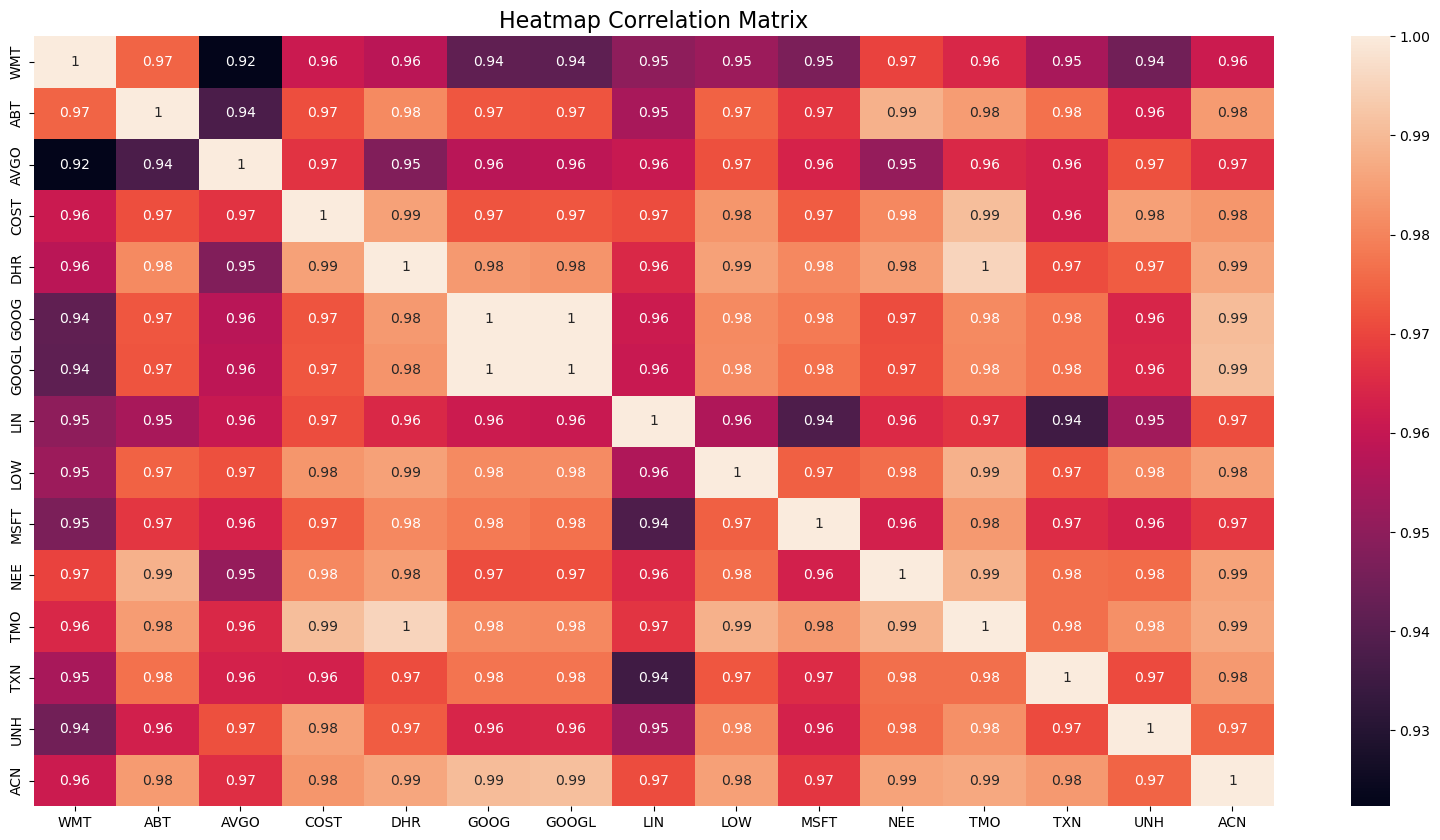

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.heatmap(df[google_corr].corr(), annot=True)
plt.title('Heatmap Correlation Matrix', loc='center', fontsize=16)
plt.show()


In [13]:
top_df= df[['AAPL', 'MSFT', 'GOOG', 'ACN']]
top_df

,AAPL,MSFT,GOOG,ACN
Date,,,,
2000-07-13,1.008929,39.968750,NaN,NaN
2000-07-14,1.030134,39.468750,NaN,NaN
2000-07-17,1.041295,39.093750,NaN,NaN
2000-07-18,1.022321,39.250000,NaN,NaN
2000-07-19,0.940848,36.562500,NaN,NaN
...,...,...,...,...
2023-07-07,190.679993,337.220001,120.139999,305.760010
2023-07-10,188.610001,331.829987,116.870003,308.450012
2023-07-11,188.080002,332.470001,117.709999,309.720001


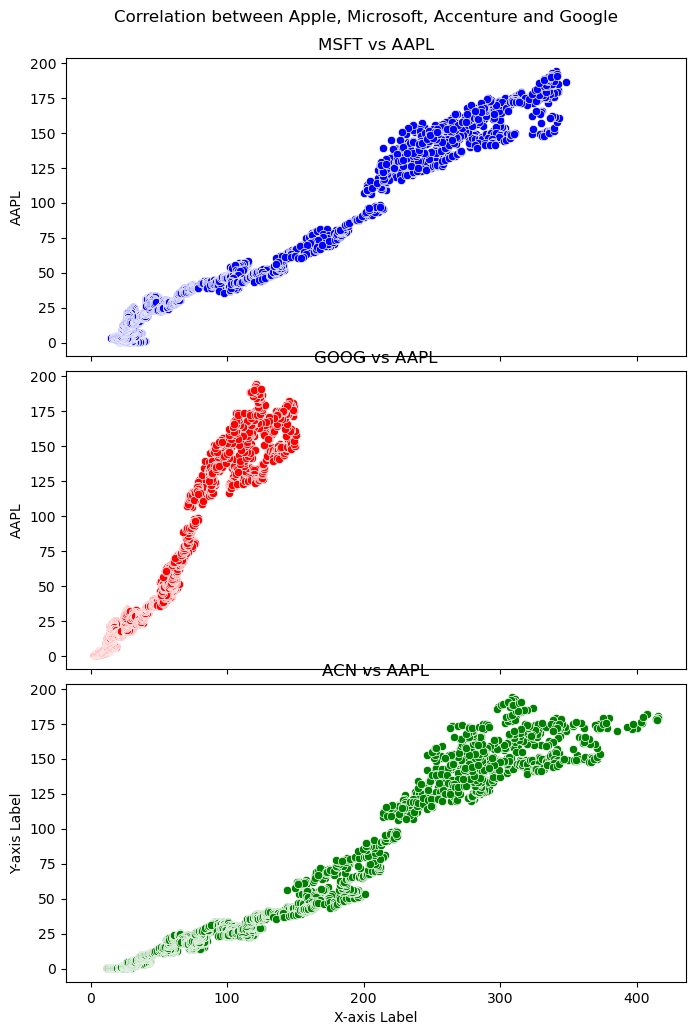

In [14]:
fig, axes= plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8,12))
plt.subplots_adjust(hspace=0.05)

colors= ['blue', 'red', 'green']

scatter1= sns.scatterplot(x=top_df['MSFT'], y=top_df['AAPL'], ax=axes[0], color=colors[0])
scatter1.set_title('MSFT vs AAPL')

scatter2= sns.scatterplot(x=top_df['GOOG'], y=top_df['AAPL'], ax=axes[1], color=colors[1])
scatter2.set_title('GOOG vs AAPL')

scatter3= sns.scatterplot(x=top_df['ACN'], y=top_df['AAPL'], ax=axes[2], color=colors[2])
scatter3.set_title('ACN vs AAPL')

plt.suptitle('Correlation between Apple, Microsoft, Accenture and Google', y=0.92)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

plt.show()

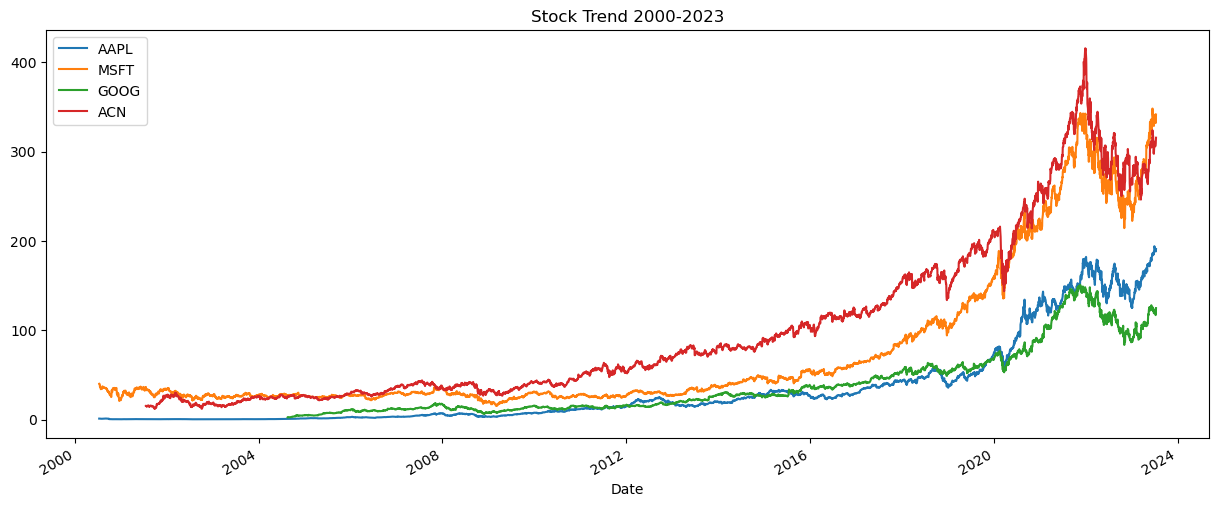

In [15]:
top_df.plot(figsize=(15,6))
plt.title('Stock Trend 2000-2023')
plt.show()

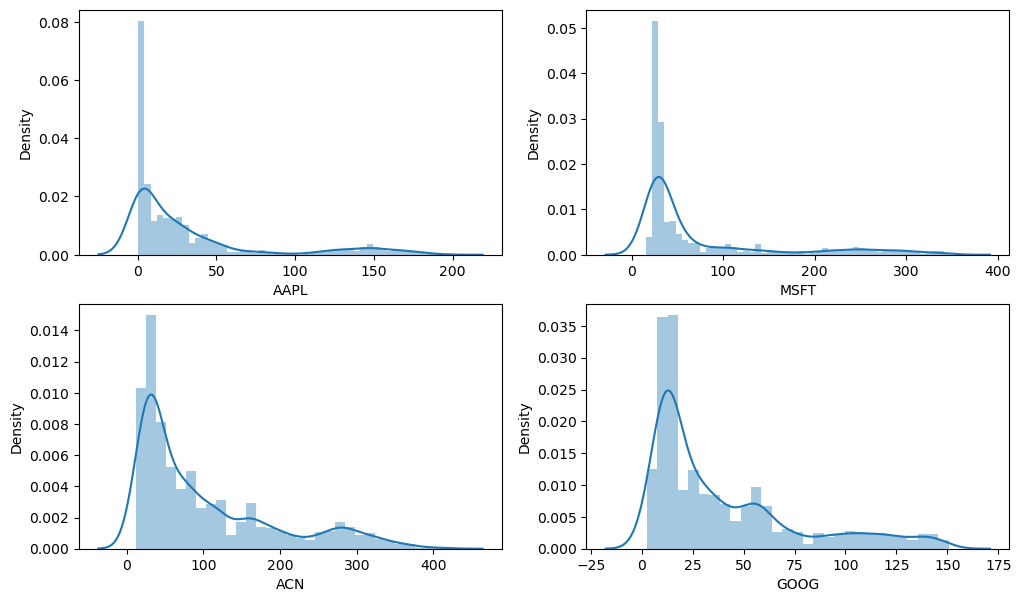

In [16]:
fig, ax= plt.subplots(2,2, figsize=(12,7))
sns.distplot(top_df['AAPL'], ax=ax[0,0])
sns.distplot(top_df['MSFT'], ax=ax[0,1])
sns.distplot(top_df['ACN'], ax=ax[1,0])
sns.distplot(top_df['GOOG'], ax=ax[1,1])
plt.show()

In [17]:
top_df['AAPL_10']=top_df['AAPL'].rolling(10).mean()
top_df['AAPL_30']=top_df['AAPL'].rolling(30).mean()
top_df['AAPL_50']=top_df['AAPL'].rolling(50).mean()

top_df['MSFT_10']=top_df['MSFT'].rolling(10).mean()
top_df['MSFT_30']=top_df['MSFT'].rolling(30).mean()
top_df['MSFT_50']=top_df['MSFT'].rolling(50).mean()

top_df['GOOG_10']=top_df['GOOG'].rolling(10).mean()
top_df['GOOG_30']=top_df['GOOG'].rolling(30).mean()
top_df['GOOG_50']=top_df['GOOG'].rolling(50).mean()

top_df['ACN_10']=top_df['ACN'].rolling(10).mean()
top_df['ACN_30']=top_df['ACN'].rolling(30).mean()
top_df['ACN_50']=top_df['ACN'].rolling(50).mean()

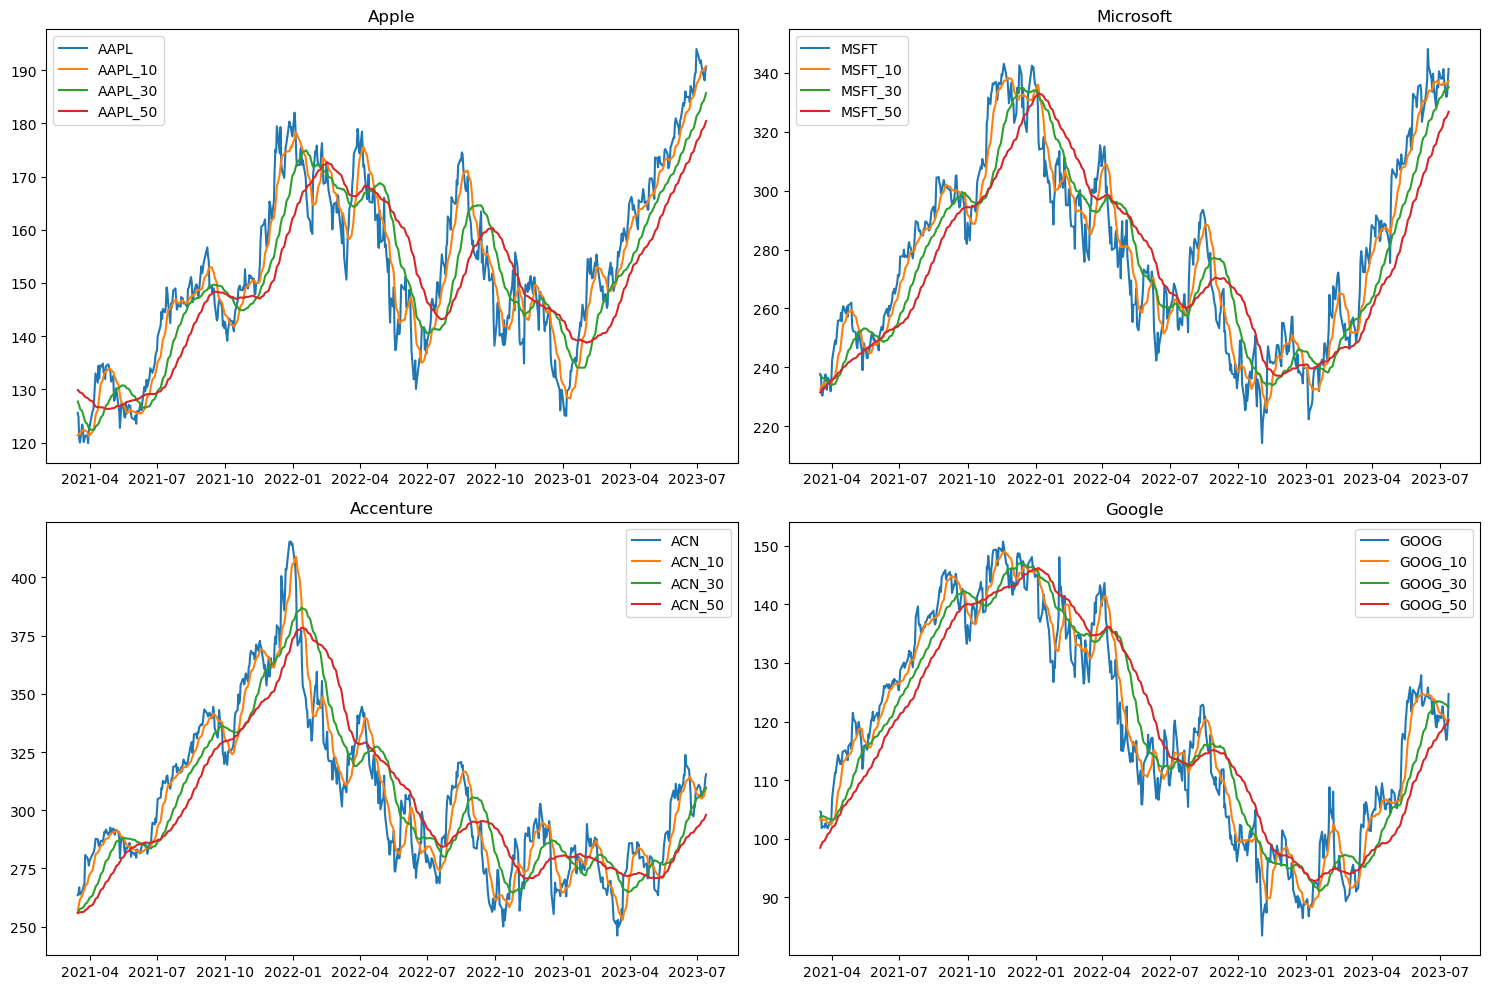

In [18]:
def plot_moving_avg(df):
    top_df=df.iloc[5200: ].copy()
    fig, ax=plt.subplots(2,2, figsize=(15,10))
    line_width= 1.5

    ax[0,0].plot(top_df[['AAPL', 'AAPL_10', 'AAPL_30', 'AAPL_50']], linewidth=line_width)
    ax[0,0].set_title('Apple')
    ax[0,0].legend(['AAPL', 'AAPL_10', 'AAPL_30', 'AAPL_50'])

    ax[0,1].plot(top_df[['MSFT', 'MSFT_10', 'MSFT_30', 'MSFT_50']], linewidth=line_width)
    ax[0,1].set_title('Microsoft')
    ax[0,1].legend(['MSFT', 'MSFT_10', 'MSFT_30', 'MSFT_50'])

    ax[1,0].plot(top_df[['ACN', 'ACN_10', 'ACN_30', 'ACN_50']], linewidth=line_width)
    ax[1,0].set_title('Accenture')
    ax[1,0].legend(['ACN', 'ACN_10', 'ACN_30', 'ACN_50'])

    ax[1,1].plot(top_df[['GOOG', 'GOOG_10', 'GOOG_30', 'GOOG_50']], linewidth=line_width)
    ax[1,1].set_title('Google')
    ax[1,1].legend(['GOOG', 'GOOG_10', 'GOOG_30', 'GOOG_50'])   

    plt.tight_layout()
    plt.show()

plot_moving_avg(top_df)

In [19]:
apple_stock= top_df[['AAPL', 'AAPL_10', 'AAPL_30', 'AAPL_50']]

In [20]:
def process_date(df):
    df=df.copy()
    df['date']=df.index
    df['dayofweek']=df['date'].dt.dayofweek
    df['weekday']=df['date'].dt.day_name()
    df['month']=df['date'].dt.month
    df['year']=df['date'].dt.year
    df['dayofyear']=df['date'].dt.dayofyear
    df['dayofmonth']=df['date'].dt.day
    df['weekofyear']=df['date'].dt.isocalendar().week


    df['date_offset']=(df.date.dt.month*100+df.date.dt.isocalendar().week-320)%1300
    df['season']=pd.cut(df['date_offset'],[0,300,602,900,1300], labels=['Spring', 'Summer', 'Fall', 'Winter'])

    return df

apple_stock=process_date(apple_stock)

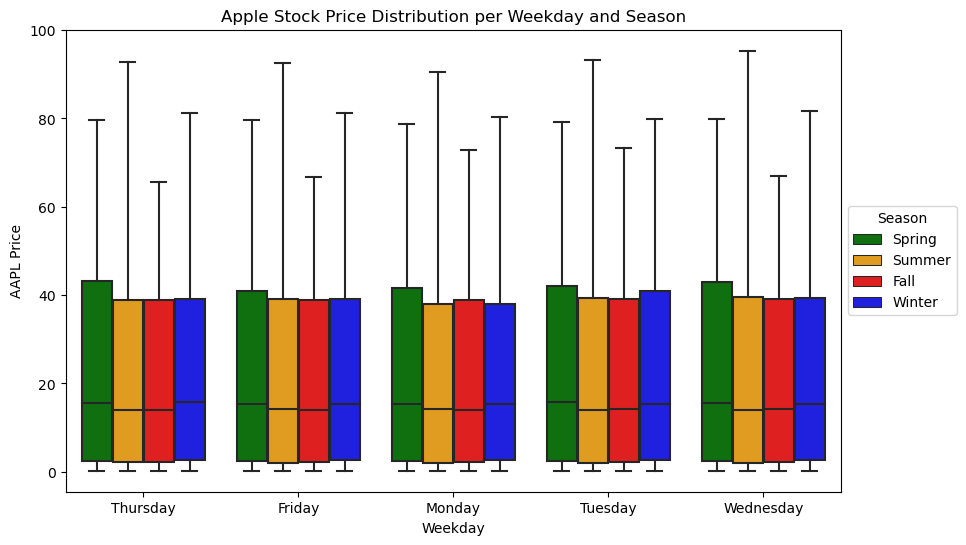

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
season_pallette= {'Winter':'blue', 'Spring':'green','Summer':'orange', 'Fall':'red'}

sns.boxplot(data=apple_stock, x='weekday', y='AAPL', hue='season', palette=season_pallette, showfliers=False)

plt.title('Apple Stock Price Distribution per Weekday and Season')
plt.xlabel('Weekday')
plt.ylabel('AAPL Price')
plt.legend(title='Season', loc='center left', bbox_to_anchor=(1,0.5))
##plt.figure.update_traces(quartilemethod='inclusive')
##plt.figure.update_layout(title_x=0.5)
plt.show()

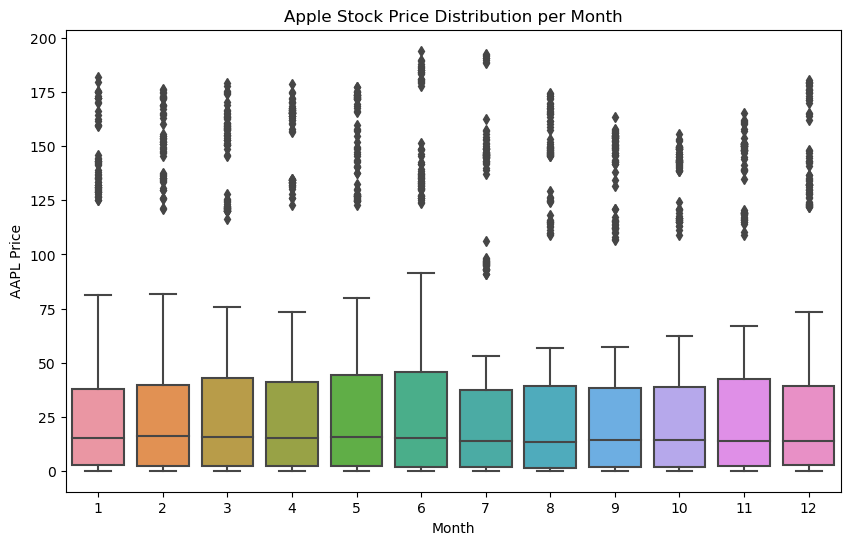

In [22]:
plt.figure(figsize=(10,6))

sns.boxplot(data=apple_stock, x='month', y='AAPL')

plt.title('Apple Stock Price Distribution per Month')
plt.xlabel('Month')
plt.ylabel('AAPL Price')
##plt.legend(title='Months', loc='center left', bbox_to_anchor=(1,0.5))

plt.show()

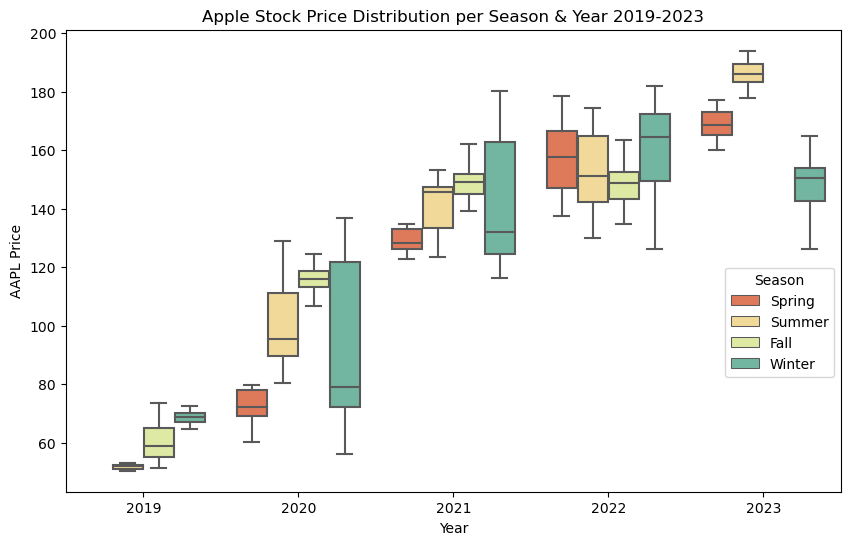

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
##season_pallette= {'Winter':'blue', 'Spring':'green','Summer':'orange', 'Fall':'red'}

ax= sns.boxplot(data=apple_stock.iloc[4800: ], x='year', y='AAPL', hue='season', palette='Spectral', showfliers=False)

plt.title('Apple Stock Price Distribution per Season & Year 2019-2023')
plt.xlabel('Year')
plt.ylabel('AAPL Price')
ax.legend(title='Season', loc='upper right', bbox_to_anchor=(1,0.5))
plt.show()

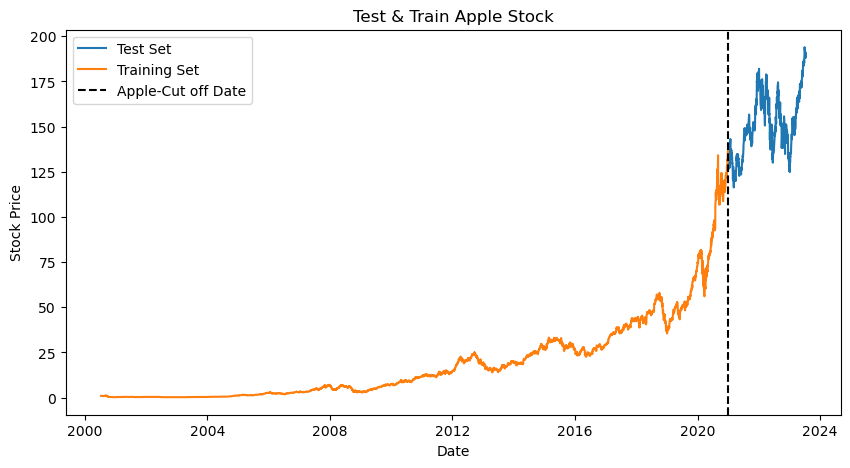

In [46]:
## train and test
apple_cutoff_date= '2021-01-01'
apple_stock_train= apple_stock.loc[apple_stock.index <= apple_cutoff_date].copy()
apple_stock_test= apple_stock.loc[apple_stock.index>apple_cutoff_date].copy()
apple_cutoff_date=pd.to_datetime(apple_cutoff_date)

plt.figure(figsize=(10,5))
plt.plot(apple_stock_test.index, apple_stock_test['AAPL'], '-', markersize=1, label='Test Set')
plt.plot(apple_stock_train.index, apple_stock_train['AAPL'], '-', markersize=1, label='Training Set')
plt.axvline(x=apple_cutoff_date, color='black', linestyle='--', label='Apple-Cut off Date')
plt.title('Test & Train Apple Stock')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [52]:

df= pd.read_csv('/Users/lalebaksi/Desktop/DS_Pactice/sep100.csv')
df_Apple_data= df[['Date', 'AAPL']]
df_Apple_data['Date']=pd.to_datetime(df_Apple_data.Date)
df_Apple_data=df_Apple_data.set_index('Date')

In [53]:
## let's try LTSM for squential input time series forecasting
## LTSM= Long short-term memory neural networks for time series forecasting - one type of recurrent neural network(RNN)

def Squential_LTSM(df, input_squence):
    df_np= df.to_numpy()
    x=[]
    y=[]
    for i in range(len(df_np)-input_squence):
        row=[a for a in df_np[i:i+input_squence]]
        x.append(row)
        label=df_np[i+input_squence]
        y.append(label)
    return np.array(x), np.array(y)
n_input= 10

x, y=Squential_LTSM(df_Apple_data, n_input)

In [61]:
## train the data
x_train, y_train=x[:4500], y[:4500]

x_test, y_test=x[4500:], y[4500:]


In [68]:
## prepare the model to run

epochs= 50
batch_size= 15

early_stopping= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, mode='auto', restore_best_weights=False)
n_features= 1

model_stock= tf.keras.models.Sequential()
model_stock.add(tf.keras.layers.InputLayer((n_input, n_features)))
model_stock.add(tf.keras.layers.LSTM(220, activation='tanh', return_sequences=True))
model_stock.add(tf.keras.layers.LSTM(100, activation='tanh', return_sequences=False))
model_stock.add(tf.keras.layers.Dense(40, activation='relu'))
model_stock.add(tf.keras.layers.Dense(1))

model_stock.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04, beta_1=0.92, beta_2=0.999, epsilon=1e-07, amsgrad=False, decay=1e-5, clipnorm=None, clipvalue=None, global_clipnorm=None), metrics=['mean_absolute_error'], loss=tf.keras.losses.MeanAbsoluteError())



In [70]:
## check the model
model_stock.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 10, 220)           195360    
                                                                 
 lstm_13 (LSTM)              (None, 100)               128400    
                                                                 
 dense_12 (Dense)            (None, 40)                4040      
                                                                 
 dense_13 (Dense)            (None, 1)                 41        
                                                                 
Total params: 327,841
Trainable params: 327,841
Non-trainable params: 0
_________________________________________________________________


In [72]:
history= model_stock.fit(x=x_train, y=y_train, epochs=50, batch_size=15, callbacks=early_stopping)

Epoch 1/50


2023-10-17 18:15:31.821934: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


300/300 [==============================] - 4s 9ms/step - loss: 7.1374 - mean_absolute_error: 7.1374
Epoch 2/50
300/300 [==============================] - 3s 9ms/step - loss: 3.1971 - mean_absolute_error: 3.1971
Epoch 3/50
300/300 [==============================] - 3s 9ms/step - loss: 1.6060 - mean_absolute_error: 1.6060
Epoch 4/50
300/300 [==============================] - 3s 9ms/step - loss: 0.9553 - mean_absolute_error: 0.9553
Epoch 5/50
300/300 [==============================] - 3s 9ms/step - loss: 0.6453 - mean_absolute_error: 0.6453
Epoch 6/50
300/300 [==============================] - 3s 9ms/step - loss: 0.4269 - mean_absolute_error: 0.4269
Epoch 7/50
300/300 [==============================] - 2s 8ms/step - loss: 0.3189 - mean_absolute_error: 0.3189
Epoch 8/50
300/300 [==============================] - 3s 9ms/step - loss: 0.2833 - mean_absolute_error: 0.2833
Epoch 9/50
300/300 [==============================] - 3s 9ms/step - loss: 0.2417 - mean_absolute_error: 0.2417
Epoch 10/50


In [75]:
model_stock.save('Apple LTSM Model')

INFO:tensorflow:Assets written to: Apple LTSM Model/assets


INFO:tensorflow:Assets written to: Apple LTSM Model/assets


In [76]:
y_pred=model_stock.predict(x_test)
y_pred

40/40 [==============================] - 0s 4ms/step


array([[47.19538 ],
       [47.040535],
       [46.565807],
       ...,
       [34.948067],
       [34.96201 ],
       [34.95797 ]], dtype=float32)

In [84]:
y_pred_labels=np.where(y_pred>0.5, 1, 0)
y_pred_labels


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])